# PW3-Supervised Machine Learning : A basic supervised Learning algorithms

### IMPORT

In [162]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Exercise 1 : Scale the data

In [126]:
wine_data = pd.read_csv("winequality-white.csv", sep=';')
#wine_data.info()

In [127]:
wine_data = pd.DataFrame(data=wine_data.values, columns=wine_data.columns)
display(wine_data.values)
display(wine_data.columns)

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [81]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [128]:
X=wine_data.drop("quality",axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [129]:
Y=wine_data["quality"]
Y.head()

0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: quality, dtype: float64

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=20)

In [9]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(x_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
display(mse)
display(r2)

0.602822934141091

0.26788524013845816

## Exercice 2

In [12]:
def LR_Pipeline(scaler) :
    return make_pipeline(scaler,LinearRegression())

### Test_size=0.1

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=20)

Pipeline_std=LR_Pipeline(StandardScaler())
Pipeline_minmax=LR_Pipeline(MinMaxScaler())

Pipeline_std.fit(x_train,y_train)
Pipeline_minmax.fit(x_train,y_train)

y_pred_std=Pipeline_std.predict(x_test)
y_pred_minmax=Pipeline_minmax.predict(x_test)

mse_std=mean_squared_error(y_test,y_pred_std)
mse_minmax=mean_squared_error(y_test,y_pred_minmax)

r2_std = r2_score(y_test, y_pred_std)
r2_minmax = r2_score(y_test, y_pred_minmax)

print('For test size = 0.1 we have : ')
print(f"For Standard Scaler : MSE = {mse_std}, R² = {r2_std}")
print(f"For MinMax Scaler   : MSE = {mse_minmax}, R² = {r2_minmax}")

For test size = 0.1 we have : 
For Standard Scaler : MSE = 0.641556576669303, R² = 0.2528098427486969
For MinMax Scaler   : MSE = 0.6415565766693038, R² = 0.252809842748696


### Tes_size=0.2

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
Pipeline_std=LR_Pipeline(StandardScaler())
Pipeline_minmax=LR_Pipeline(MinMaxScaler())

Pipeline_std.fit(x_train,y_train)
Pipeline_minmax.fit(x_train,y_train)

y_pred_std=Pipeline_std.predict(x_test)
y_pred_minmax=Pipeline_minmax.predict(x_test)

mse_std=mean_squared_error(y_test,y_pred_std)
mse_minmax=mean_squared_error(y_test,y_pred_minmax)

r2_std = r2_score(y_test, y_pred_std)
r2_minmax = r2_score(y_test, y_pred_minmax)

print('For test size = 0.2 we have : ')
print(f"For Standard Scaler : MSE = {mse_std}, R² = {r2_std}")
print(f"For MinMax Scaler   : MSE = {mse_minmax}, R² = {r2_minmax}")

For test size = 0.2 we have : 
For Standard Scaler : MSE = 0.6207195741681919, R² = 0.25865427519753426
For MinMax Scaler   : MSE = 0.6207195741681923, R² = 0.2586542751975337


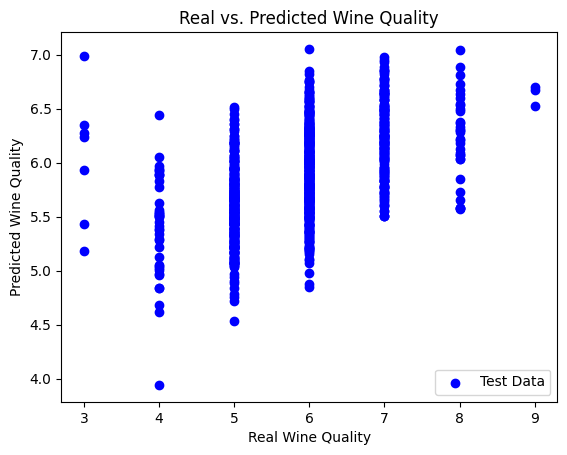

In [15]:
plt.scatter(y_test, y_pred_minmax, c='blue', marker='o', label='Test Data')
plt.xlabel("Real Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.title("Real vs. Predicted Wine Quality")
plt.legend()
plt.show()

In [16]:
coefficients = model.coef_
intercept = model.intercept_
display(coefficients,intercept)

array([ 3.31145230e-02, -1.82038106e-01, -2.66556160e-05,  3.83416602e-01,
       -9.91113036e-03,  8.96198145e-02, -3.01463831e-02, -3.85013522e-01,
        9.34259732e-02,  5.59975192e-02,  2.57031038e-01])

5.879896150244012

## Exercise 3: Logistic regression

In [130]:
Y_new=(wine_data['quality']>=5).astype(int)
x_train, x_test, y_train, y_test = train_test_split(X, Y_new, test_size=0.2, random_state=20)

In [131]:
def Reg_Pipeline(scaler,model):
    pipeline= make_pipeline(scaler,model)
    pipeline.fit(x_train, y_train)
    y_pred=pipeline.predict(x_test)
    return y_pred

In [132]:
y_pred_logistic= Reg_Pipeline(StandardScaler(),LogisticRegression())

accuracy = accuracy_score(y_test, y_pred_logistic)
confusion = confusion_matrix(y_test, y_pred_logistic)
classification_rep = classification_report(y_test,y_pred_logistic)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:", confusion)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9530612244897959

Confusion Matrix: [[  2  45]
 [  1 932]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.04      0.08        47
           1       0.95      1.00      0.98       933

    accuracy                           0.95       980
   macro avg       0.81      0.52      0.53       980
weighted avg       0.94      0.95      0.93       980



## Exercise 4: Naive Bayes classification

In [133]:
y_pred_gnb = Reg_Pipeline(StandardScaler(),GaussianNB())

accuracy = accuracy_score(y_test, y_pred_gnb)
confusion = confusion_matrix(y_test,y_pred_gnb)
classification_rep = classification_report(y_test,y_pred_gnb)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:", confusion)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9336734693877551

Confusion Matrix: [[ 15  32]
 [ 33 900]]

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.32      0.32        47
           1       0.97      0.96      0.97       933

    accuracy                           0.93       980
   macro avg       0.64      0.64      0.64       980
weighted avg       0.93      0.93      0.93       980



## Exercise 5: performance comparison between different models


In [134]:
label_binarizer = LabelBinarizer()
y_test_one_hot = label_binarizer.fit_transform(y_test)

# Assuming y_pred_logistic and y_pred_gnb are the predicted class labels (not probabilities) from Logistic Regression and GaussianNB models
y_pred_logistic_one_hot = label_binarizer.transform(y_pred_logistic)
y_pred_gnb_one_hot = label_binarizer.transform(y_pred_gnb)

roc_auc_logistic = roc_auc_score(y_test_one_hot, y_pred_logistic_one_hot, average='weighted')
roc_auc_gnb = roc_auc_score(y_test_one_hot, y_pred_gnb_one_hot, average='weighted')

if roc_auc_logistic > roc_auc_gnb:
    print("Logistic Regression is better based on AUC-ROC.")
else:
    print("Gaussian Naive Bayes is better based on AUC-ROC.")
    
print('Result of the AUC-ROC')
print(f"AUC-ROC with Logistic Regression : {roc_auc_logistic}")
print(f"AUC-ROC with GaussianNB : {roc_auc_gnb}")

Gaussian Naive Bayes is better based on AUC-ROC.
Result of the AUC-ROC
AUC-ROC with Logistic Regression : 0.5207406900640806
AUC-ROC with GaussianNB : 0.6418895806252993


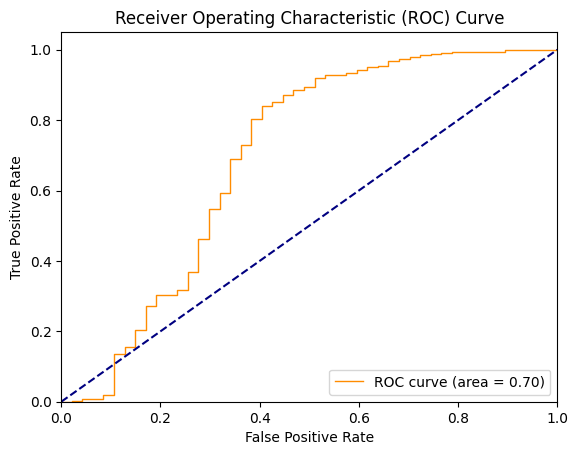

In [136]:
pipe_lgr=make_pipeline(StandardScaler(),LogisticRegression())
pipe_lgr.fit(x_train, y_train)
probs = pipe_lgr.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Exercise 6: Do it from scratch

### Data information and preprocessing

In [109]:
df= pd.read_csv("data_BreastCancer.csv", sep=',')
df=df.drop("Unnamed: 32",axis=1)
df= pd.DataFrame(data=df.values, columns=df.columns)
display(df.info(),df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       569 non-null    object
 1   diagnosis                569 non-null    object
 2   radius_mean              569 non-null    object
 3   texture_mean             569 non-null    object
 4   perimeter_mean           569 non-null    object
 5   area_mean                569 non-null    object
 6   smoothness_mean          569 non-null    object
 7   compactness_mean         569 non-null    object
 8   concavity_mean           569 non-null    object
 9   concave points_mean      569 non-null    object
 10  symmetry_mean            569 non-null    object
 11  fractal_dimension_mean   569 non-null    object
 12  radius_se                569 non-null    object
 13  texture_se               569 non-null    object
 14  perimeter_se             569 non-null    o

None

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [110]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
4,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,...,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678


In [163]:
X=df.drop("diagnosis",axis=1)
Y=(df['diagnosis']=="B").astype(int)

### Global function

In [173]:
def Global_Pipeline(X,Y,size,scaler,model):
    pipeline=make_pipeline(scaler,model)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=size, random_state=20)
    pipeline.fit(x_train, y_train)
    y_pred=pipeline.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test,y_pred)
    classification_rep = classification_report(y_test,y_pred)
    fpr = None
    tpr = None
    roc_auc = None

    # Compute ROC curve and AUC for binary classification or OvR
    if len(np.unique(Y)) == 2:  # Binary classification
        probs = pipeline.predict_proba(x_test)
        probs = probs[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)
    else:  # OvR for multiclass classification
        roc_auc = roc_auc_score(y_test, pipeline.predict_proba(x_test), multi_class='ovr')
        
    return accuracy,confusion,classification_rep,y_test,y_pred, fpr, tpr, roc_auc

### Result and Conclusion

In [174]:
accuracy_LR, confusion_LR, classification_rep_LR, y_test_2, y_pred_LR, fpr_LR, tpr_LR, roc_auc_LR = Global_Pipeline(X, Y, 0.2, StandardScaler(), LogisticRegression())
accuracy_GNB, confusion_GNB, classification_rep_GNB, y_test_2, y_pred_GNB, fpr_GNB, tpr_GNB, roc_auc_GNB = Global_Pipeline(X, Y, 0.2, StandardScaler(), GaussianNB())

In [175]:
print('For the Logistic Regression')
print("Accuracy:", accuracy_LR)
print("\nConfusion Matrix:", confusion_LR)
print("\nClassification Report:\n", classification_rep_LR)

For the Logistic Regression
Accuracy: 0.9912280701754386

Confusion Matrix: [[47  1]
 [ 0 66]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [176]:
print('For the Gaussian NB')
print("Accuracy:", accuracy_GNB)
print("\nConfusion Matrix:", confusion_GNB)
print("\nClassification Report:\n", classification_rep_GNB)

For the Gaussian NB
Accuracy: 0.9210526315789473

Confusion Matrix: [[43  5]
 [ 4 62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91        48
           1       0.93      0.94      0.93        66

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [177]:
label_binarizer = LabelBinarizer()
y_test_one_hot = label_binarizer.fit_transform(y_test_2)

# Assuming y_pred_logistic and y_pred_gnb are the predicted class labels (not probabilities) from Logistic Regression and GaussianNB models
y_pred_logistic_one_hot = label_binarizer.transform(y_pred_LR)
y_pred_gnb_one_hot = label_binarizer.transform(y_pred_GNB)

roc_auc_logistic = roc_auc_score(y_test_one_hot, y_pred_logistic_one_hot, average='weighted')
roc_auc_gnb = roc_auc_score(y_test_one_hot, y_pred_gnb_one_hot, average='weighted')

if roc_auc_logistic > roc_auc_gnb:
    print("Logistic Regression is better based on AUC-ROC.")
else:
    print("Gaussian Naive Bayes is better based on AUC-ROC.")
    
print('Result of the AUC-ROC')
print(f"AUC-ROC with Logistic Regression : {roc_auc_logistic}")
print(f"AUC-ROC with GaussianNB : {roc_auc_gnb}")

Logistic Regression is better based on AUC-ROC.
Result of the AUC-ROC
AUC-ROC with Logistic Regression : 0.9895833333333333
AUC-ROC with GaussianNB : 0.9176136363636365


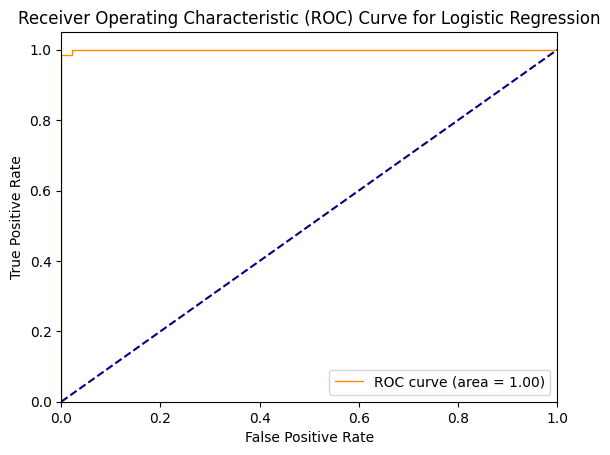

In [178]:
plt.figure()
plt.plot(fpr_LR, tpr_LR, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc_LR)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

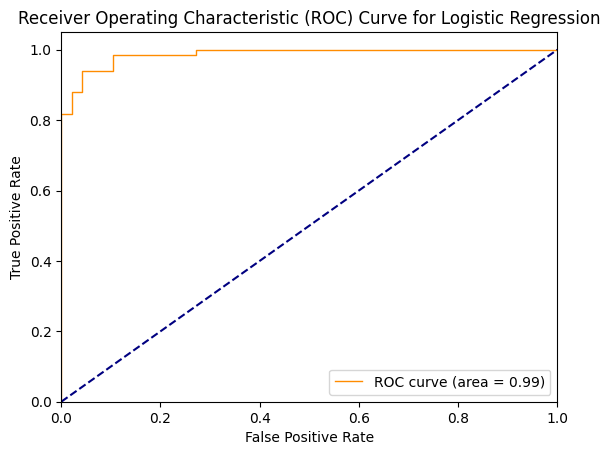

In [179]:
plt.figure()
plt.plot(fpr_GNB, tpr_GNB, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc_GNB)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()